<a href="https://colab.research.google.com/github/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/blob/main/TareaSemana1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![MAIA banner](https://raw.githubusercontent.com/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/main/Images/Aprendizaje_refuerzo_profundo_Banner_V1.png)

# <h1><center>Tarea Tutorial - Semana 1 <a href="https://colab.research.google.com/github/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/blob/main/TareaSemana1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" width="140" align="center"/></a></center></h1>

<center><h1>Aproximación de Funciones</h1></center>

En este tutorial aprenderás acerca de las ventajas que tiene utilizar aproximación de funciones en problemas de aprendizaje por refuerzo profundo. Ilustraremos el proceso con el problema de <a href="https://gymnasium.farama.org/environments/classic_control/cart_pole/">Cart Pole</a>, incluido en las librerías de Gym, e implementaremos redes nuronales con el framework <a href="https://github.com/inarikami/keras-rl2/blob/master/examples/dqn_cartpole.py">keras-rl2</a>, que ya incluye varios algoritmos de aprendizaje por refuerzo. El objetivo principal será comparar el desempeño de distintos algoritmos en su versión tabular y su versión con redes neuronales. Este notebook tutorial se divide en las siguientes secciones:


# Tabla de Contenidos
1. [Objetivos de Aprendizaje](#scrollTo=Objetivos_de_Aprendizaje)  
2. [Marco Teórico](#scrollTo=Marco_Te_rico)  
3. [Instalación de Librerías](#scrollTo=Instalaci_n_de_Librer_as)  
4. [Familiarización con el Entorno de Gym](#scrollTo=Familiarizaci_n_con_el_Entorno_de_Gym)  
5. [Métodos Tabulares](#scrollTo=M_todos_Tabulares)  
6. [Métodos con Redes Neuronales](#scrollTo=M_todos_con_Redes_Neuronales)  
7. [Comparación](#scrollTo=Comparaci_n)  
8. [Conclusiones](#scrollTo=Conclusiones)  
9. [Referencias](#scrollTo=Referencias)

# Objetivos de Aprendizaje  
  
* Implementar métodos de aprendizaje por refuerzo de forma existosa con redes neuronales (Deep SARSA y Deep Q-Networks).
* Familiarizarse con los entornos de simulación de Gym.
* Identificar las ventajas de implementar aproximación funciones en comparación a utilizar una versión tabular de los algoritmos.


# Marco Teórico  
En el aprendizaje por refuerzo hay dos grandes familias de métodos para encontrar políticas de comportamiento óptimas: los métodos tabulares y los métodos por aproximación de funciones. Entre los métodos tabulares algunos de los algoritmos más utilizados son los de SARSA y Q-Learning. En la aproximación de funciones mediante redes neuronales estos dos métodos encuentran su equivalente en la forma de Deep SARSA y Deep Q-Networks (DQN).


![Interaccion_agente_ambiente](https://raw.githubusercontent.com/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/main/Images/Interaccion_agente_ambiente.png)

<center>Figura 1. Interacción de un agente con el ambiente en un problema de aprendizaje por refuerzo. [1]</center>


Recordemos que un ambiente en un problema de aprendizaje por refuerzo está definido por estados, acciones y recompensas. En casa estado $S_t$ el agente toma una acción $A_t$, y tiene cierta probabilidad de pasar a otro estado $S_{t+1}$ y recibir una recompensa $R_{t+1}$. El objetivo del aprendizaje por refuerzo es hallar una política de comportamiento tal que en cada estado el agente escoja la mejor acción posible para maximizar el retorno obtenido a largo plazo. Precisamente, esto es lo que indica la función de valor de parejas estado-acción $Q(S_t,A_t)$. La función $Q$ nos dice cuál es el retorno esperado si es un estado $S_t$ se toma una acción $A_t$ siguiendo una política específica $\pi$. SARSA y Q-Learning son métodos que iterativamente calculan esta función $Q$ de acuerdo con las siguientes reglas de actualización:

<center> $Q(S_t,A_t) \ ← \ Q(S_t,A_t)+α[R_{t+1}+\gamma Q(S_{t+1},A_{t+1})-Q(S_t,A_t)]$ &emsp;&emsp;&emsp;$(1)$ </center>

<center> $Q(S_t,A_t) \ ← \ Q(S_t,A_t)+α[R_{t+1}+\gamma \underset{a}{\max} Q(S_{t+1},a)-Q(S_t,A_t)]$ &emsp;&emsp;&emsp;$(2)$ </center>

La Ecuación (1) es la regla de actualización que usa SARSA y la Ecuación (2) es la regla de actualización que utiliza Q-Learning. Note que la única diferencia entre ambas expresiones es un término de maximización sobre acciones que aparece en la Ecuación (2). Esto deriva de que SARSA es un algoritmo <i>on-policy</i> mientras que Q-Learning es <i>off-policy</i>. Esto quiere decir que SARSA genera un comportamiento en el ambiente con la misma política que mejora, lo cual tiene como limitación que debe mantener exploración (<i>soft</i>). Al contrario, en Q-Learning la política que se mejora es distinta a la política que genera el comportamiento, por lo cual se puede hacer (<i>greedy</i>). Los macroalgoritmos correspondientes se muestran en la Figura 2 y en la Figura 3:


![SARSA_tabular](https://raw.githubusercontent.com/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/main/Images/SARSA_tabular.png)

<center>Figura 2. Algoritmo de SARSA para control de política (versión tabular). [1]</center>

![QLearning_tabular](https://raw.githubusercontent.com/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/main/Images/QLearning_tabular.png)


<center>Figura 3. Algoritmo de Q-Learning para control de política (versión tabular). [1]</center>

Note que el problema de la versión tabular es que se necesita estimar $Q(S_t,A_t)$ para cada pareja estado-acción. Cuando el problema es muy grande, es decir, que tiene muchos estados y acciones posibles, hay muchas entradas en la tabla que deben actualizarse. Esto no solo ocupa un gran espacio en memoria, sino que también complica la actualización de muchas parejas estado-acción si la exploración no es apropiada y puede demandar una cantidad demasiado grande de cálculos, recursos computacionales y tiempo.  

Por otro lado, en la versión de aproximación de funciones de estos algoritmos, primero hay que definir qué tipo de aproximación se utilizará. En [1] aparecen muchas opciones para aproximar las funciones de valor, entre las cuales se encuentran una versión de parámetros lineales, polinomios, codificación, entre otros. No obstante, la alternativa más utilizada actualmente y probablemente la más útil y robusta, es el uso de redes neuronales profundas. Las redes neuronales permiten estimar funciones modificando la salida a partir de una entrada utilizando pesos asociados a cada neurona y funciones no lineales que, combinadas, pueden reproducir casi cualquier tipo de función si se utilizan suficientes neuronas (y de ahí el término profundas).  

Fue en el año 2013 que Mnih et al. [2] publicaron un paper en el cual se detalla la implementación de redes neuronales profundas para la ejecución del algoritmo de Q-Learning en el aprendizaje de juegos de Atari. En su momento, este paper impuso un nuevo estado del arte, ya que fue la primera vez que se logró trasladar la ventaja de usar redes neuronales que aprendieran de datos sensoriales crudos, como los pixeles de una imágen, al campo de aprendizaje por refuerzo con éxito. En la Figura 3 se muestra el algoritmo propuesto de Deep Q-Networks o DQN:

![DQN](https://raw.githubusercontent.com/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/main/Images/DQN.png)


<center>Figura 4. Algoritmo de DQN para control de política. [2]</center>

Por otro lado, Deep SARSA es un algoritmo que, aunque utiliza redes neuronales profundas para realizar un estimativo de la función de valor, no tiene un almacenamiento en memoria de las experiencias observadas, que es una de las ventajas de DQN señaladas en [2], y también se caracteriza por ser <i>on-policy</i>.


# Instalación de Librerías  

Corra el siguiente bloque de código para instalar las librerías requeridas en el tutorial. Se encuentran incluídos módulos oficiales que ejecutan agentes de Deep SARSA y DQN, y el ambiente de <i>Cart-Pole</i> de <i>Gym</i>.


In [22]:
#Descarga librerías no incluidas en Colab usando pip
!pip install tensorflow==2.12 keras==2.12 keras-rl2 #instala versión de tensorflow compatible y keras-rl2
!pip install gymnasium #gym
!pip install renderlab #para renderizar gym
!pip install ale-py #ale-py

#Importa estas librerías
import tensorflow as tf #importa tensorflow
from keras.models import Sequential #de keras importa el modelo secuencial de redes
from keras.layers import Dense, Activation, Flatten, Input #de keras importa tipos de capas de la red
from tensorflow.keras.optimizers import Adam #de keras importa Adam para solucionar el gradiente
from rl.agents.dqn import DQNAgent #de keras rl 2 importa el agente de de DQN
from rl.agents.sarsa import SARSAAgent #de keras rl 2 importa el agente de Deep SARSA
from rl.policy import BoltzmannQPolicy #de keras rl2 importa la política de Boltzmann Q
from rl.memory import SequentialMemory #de keras rl2 importa memoria secuencial

import gymnasium as gym #importa la libreria de gym con las simulaciones
import renderlab #importa renderlab para los videos

#Importa otras librerías básicas
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

#Limpia los registros generados
from IPython.display import clear_output
clear_output()

# Familiarización con el Entorno de Gym

El ambiente de Gym de <a href="https://gymnasium.farama.org/environments/classic_control/cart_pole/">Cart Pole</a> consiste de un carrito que debe moverse a la izquierda o a la derecha para intentar balancear un poste que tiene en la parte superior. Puede leer más detalladamente la documentación de este ambiente en los foros oficiales de Gymnasium.

![Observation_space_cartpole](https://raw.githubusercontent.com/SSolanoRuniandes/Notebooks-Aprendizaje-por-Refuerzo-Profundo/main/Images/Observation_space_cartpole.png)

<center>Figura 5. Espacio de observación del ambiente de <i>CartPole</i>. [1]</center>

El ambiente está definido por un estado continuo en 4 dimensiones, que definen posición y velocidad del carrito, y posición y velocidad angular del poste. Por otro lado, sólo hay dos acciones posibles: 0 el carrito se mueve a la izquierda, y 1 el carrito va a la derecha. La meta es evitar que el poste caiga por el mayor tiempo posible, por lo que en cada paso de la simulación que el poste no caiga se obtiene recompensa +1. Si el poste sale del rango [-12°, 12°], el episodio se da por terminado, mientras que si el episodio supera los 500 pasos, se da por truncado; en ambos casos se finaliza la simulación.

Esto quiere decir que el retorno sin descuento máximo que se podría obtener en una simulación es de 500.

## Ejemplo

En el siguiente bloque de código se muestra un ejemplo de cómo se simula un episodio del <i>CartPole</i>. En este caso siempre se toma la acción de ir a la izquierda (0).

In [ ]:
#Ejemplo de simulación de un episodio de CartPole

env_prueba_1 = gym.make("CartPole-v1", render_mode="rgb_array") #Esta línea de código crea el ambiente.
env_render_1 = renderlab.RenderFrame(env_prueba_1, "./output") #Esta línea se utiliza para crear una copia que se pueda renderizar con renderlab

obs , info =env_render_1.reset() #Se reinicia el estado para comenzar. En obs se almacena el estado observado (continuo, 4 dimensiones)
terminated = False #Inicializa una condición para el loop
truncated = False #Inicializa una condición para el loop
total_reward=0 #Inicializa contador del retorno

while not (terminated or truncated): #Simula hasta que el poste caiga o hasta alcanzar 500 episodios (configuración de CartPole-v1)
  action=0 #Decide una acción. En este caso, siempre va a la izquierda
  obs, reward, terminated, truncated , info = env_render_1.step(action) #Con la función step el ambiente da un paso. Se obtiene el estado, recompensa y banderas de información
  total_reward+=reward #Llevamos una cuenta de la recompensa total

print("Total Reward in one episode: ",total_reward) #Después de terminar el episodio, imprimios la recompensa total obtenida
print("\n\n")

env_render_1.play() #Con esta función se obtiene el video de la simulación

Total Reward in one episode:  8.0



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Puede observar que el retorno obtenido fue de aproximadamente 10.0. Este valor es muy lejano del ideal 500 discutido anteriormente. Vemos igualmente que el video es muy corto porque falla casi de inmediato la tarea.

## Ejercicio práctico

Para comprobar el entendimiento de la simulación, modifique el ejemplo anterior cambiando la acción. Simule 10 episodios donde la acción sea sólo ir a la derecha y luego 10 episodios donde la acción se escoja aleatoriamente entre izquierda y derecha (recuerde utilizar la función reset() antes de comenzar un nuevo episodio). Calcule después la recompensa total promedio en cada caso y renderice un video de la última simulación.

In [ ]:
# Simulación de 10 episodios moviéndose siempre a la derecha

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

In [ ]:
# Simulación de 10 episodios moviéndose aleatoriamente a la izquierda o a la derecha

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

# Métodos Tabulares  

Para el análisis de los métodos tabulares, se suministra como base la Clase <i>Learning_CartPole</i>, la cual ya implementa discretización del espacio de estados y acciones, los algoritmos de SARSA y Q-Learning, y métodos para renderizar el ambiente y hacer un análisis de la recompensa por episodio de entrenamiento.


In [52]:
class Learning_CartPole(object):
    def __init__(self,gamma,alpha,epsilon,env_name='CartPole-v1',divisions_per_variable=(10,10,10,10)) -> None:
        self.gamma=gamma #factor de descuento
        self.alpha=alpha #tamaño de paso de aprendizaje
        self.epsilon=epsilon #epsilon para políticas epsilon-greedy
        self.env = gym.make(env_name, render_mode = "rgb_array") #crea un ambiente
        self.env_render = renderlab.RenderFrame(self.env, "./output") #crea un ambiente por separado para renderizar
        self.limits_space_state=[(-4.8,4.8),(-2,2),(-0.418,0.418),(-2,2)] #límites de los estados
        self.divisions_per_variable=divisions_per_variable #discretizacion
        self.TargetPolicy={} #inicializa política objetivo
        self.BehaviorPolicy={} #inicializa política de comportamiento
        self.Q={} #inicializa tabla de Q
        self.bins = [self.create_bins(self.limits_space_state[i],self.divisions_per_variable[i]-1) for i in range(4)]

        self.states=[]

        for position in self.bins[0]:
          for velocity in self.bins[1]:
            for angle in self.bins[2]:
              for a_vel in self.bins[3]:
                self.states.append((position,velocity,angle,a_vel)) #crea un estado definiendo una tupla de 4 elementos



    def create_bins(self,i,num):
        return np.arange(num+1)*(i[1]-i[0])/num+i[0]

    def discretize_bins(self, x):
        r = tuple((np.digitize(x[i], self.bins[i]) - 1) if x[i] > self.bins[i][-1] else np.digitize(x[i], self.bins[i]) for i in range(4))
        # print("r:",r)
        return (self.bins[0][r[0]], self.bins[1][r[1]], self.bins[2][r[2]], self.bins[3][r[3]])

    def PolicyGreedyUpdate(self,state):
      #Esta función actualiza la política target en un único estado haciéndola epsilon-greedy con respecto al estimativo de Q
       #Parámetro state: estado donde se actualiza la política haciéndola epsilon-greedy
       pi_policy={0:0,1:0}  #inicializa ambas probabilidades en epsilon/2
       pi_policy[max(self.Q[state],key=self.Q[state].get)]=1 #para el índice de acción a que maximiza Q(s,a) la probabilidad cambia a 1-epsilon+epsilon/2
       self.TargetPolicy[state]=pi_policy #se actualiza la política en estado state

    def PolicyEpsilonGreedyUpdate(self,state):
      #Esta función hace a la política greedy con respecto al estimativo de Q en todos los estados
       pi_policy={0:self.epsilon/2,1:self.epsilon/2} #calcula prob en el estado peor
       pi_policy[max(self.Q[state],key=self.Q[state].get)]=1-self.epsilon+self.epsilon/2 #calcula prob en el otro estado
       self.TargetPolicy[state]=pi_policy #guarda en el estado las probabilidades

    def CreateGreedyPolicy(self):
      #Esta función hace a la política greedy con respecto al estimativo de Q en todos los estados
      for s in range(len(self.states)): #un ciclo recorre todos los estados
          self.PolicyGreedyUpdate(self.states[s])  #en cada estado se llama a la función PolicyGreedyUpdate

    def CreateEpsilonGreedyPolicy(self):
      #Esta función hace a la política epsilon-greedy con respecto al estimativo de Q en todos los estados
      for s in range(len(self.states)): #un ciclo recorre todos los estados
          self.PolicyEpsilonGreedyUpdate(self.states[s])  #en cada estado se llama a la función PolicyEpsilonGreedyUpdate

    def ChooseEpsilonGreedyAction(self,state,q):
      #Esta función escoge qué acción tomar en caso que sea aleatorio según una pol´pitica epsilon-greedy
      #Parámetro state: El estado state donde debe decidir una acción
      #Parámetro q: El estimativo de Q que se tiene en ecuenta para tomar la decisión (Integer 0 o 1)
      #Return: La acción que toma A

      aleatorio=random.uniform(0, 1) #genera un número aleatorio entre 0 y 1
      mejor=max(q[state], key=q[state].get) #obtiene el indice de la mejor acción de acuerdo con q
      otras=[0,1] #lista de posibles acciones
      if(aleatorio>=self.epsilon): #si el número escogido es mayor a epsilon
        A=mejor  #toma la mejor acción
      else: ##si el número generado es menor a epsilon
        A=random.choice(otras)  #escoge  aleatoriamente de la lista de acciones
      return A #retorna un integer 0 o 1

    def SARSA(self,number_of_episodes):
      #Algoritmo de SARSA on-policy
      #Parámetro number_of_episodes: Integer mayor a 0 que indica cuántos episodios generar para usar como muestra
      #Return: una lista con el historial de recompensas por episodio

      self.Q={s:{0:0,1:0} for s in self.states} #inicializa Q
      training_history=[] #crea una lista vacía
      for _ in range(number_of_episodes): #itera el número de episodios
        obs , info=self.env.reset() #reinicia el ambiente y ve el estado
        S=self.discretize_bins(obs) #discretiza los estados
        A=self.ChooseEpsilonGreedyAction(S,self.Q) #elige acción tipi epsilon greedy
        terminated = False #inicializa condición de while
        truncated = False #inicializa condición de while
        r=0 #recompensa inicial
        while not (terminated or truncated): #si pierde o trucando en 500
          obs, rew, terminated, truncated , info = self.env.step(A) #toma A, observa recompensa, siguiente estado
          next_state = self.discretize_bins(obs) #discretiza la observación dentro de los estados de la tabla
          R=rew #extrae variable
          r=r+R #suma recompensa al total
          Aprima=self.ChooseEpsilonGreedyAction(next_state,self.Q) #selecciona otra acción
          self.Q[S][A]=self.Q[S][A]+self.alpha*(R+self.gamma*self.Q[next_state][Aprima]-self.Q[S][A]) #ecuación 1
          S=next_state #siguiente estado
          A=Aprima #siguiente accion
        training_history.append(r) #por espisodio guarda la recompensa final
      return training_history #retorna lista con recompensas por espisodio


    def QLearning(self,number_of_episodes):
      #Algoritmo de Q-Learning off-policy
      #Parámetro number_of_episodes: Integer mayor a 0 que indica cuántos episodios generar para usar como muestra
      #Return: una lista con el historial de recompensas por episodio

      self.Q={s:{0:0,1:0} for s in self.states} #inicializa el estimativo de Q en 0 para todas las parejas estado-acción
      training_history=[]  #crea una lista vacía
      for _ in range(number_of_episodes): #itera el número de episodios
        obs , info=self.env.reset()  #reinicia el ambiente y ve el estado
        # print(obs)
        terminated = False #inicializa condición de while
        truncated = False #inicializa condición de while
        S=self.discretize_bins(obs) #discretiza en los estados de la tabla
        # print(S)
        r=0 #inicializa recompensa
        while not (terminated or truncated): #si pierde o trucando en 500
          A=self.ChooseEpsilonGreedyAction(S,self.Q) #elige acción tipi epsilon greedy
          obs, rew, terminated, truncated , info = self.env.step(A)  #toma A, observa recompensa, siguiente estado
          # print(obs)
          next_state=self.discretize_bins(obs)  #discretiza la observación dentro de los estados de la tabla
          # print(next_state)
          Sprima=next_state
          R=rew #Extrae variable
          r=r+R #suma recompensa al total
          self.Q[S][A]=self.Q[S][A]+self.alpha*(R+self.gamma*self.Q[Sprima][max(self.Q[Sprima], key=self.Q[Sprima].get)]-self.Q[S][A]) #ecuación 2
          S=Sprima #siguiente estado
        training_history.append(r)  #por espisodio guarda la recompensa final
      return training_history #retorna lista con recompensas por espisodio


    def ExecutePolicy(self):
        #Esta función ejecuta la polític actualmente en Target dentro del ambiente de simulación

        obs , info =self.env.reset() #reinicia el ambiente
        S=self.discretize_bins(obs) #discretiza estados
        cumulative_gamma=1 #factor de descuento
        R=0 #en el tiempo inicial la reocmpensa es 0
        t=0
        terminated = False #inicializa condición de while
        truncated = False #inicializa condición de while
        while not (terminated or truncated): #si pierde o trucando en 500
          left_percentage=self.TargetPolicy[S][0] #probabilidad de escoger izquierda según pi
          rigth_percentage=self.TargetPolicy[S][1] #probabilidad de escoger derecha según pi
          if (left_percentage==1): #caso determinístico izquierda
              action=0
          elif (rigth_percentage==1): #caso determinístico derecha
              action=1
          else: #si no
              decision=random.uniform(0,1) #genera un número aleatorio entre 0 y 1
              if (decision<=left_percentage): #compara para elegir
                action=0 #izq
              else:
                action=1 #der
          t=t+1 #suma tiempo
          obs, rew, terminated, truncated , info = self.env.step(action) #recopila la observación
          next_state=self.discretize_bins(obs) #discretización
          Sprima=next_state #
          R=R+rew*cumulative_gamma #aplica descuento
          cumulative_gamma=cumulative_gamma*self.gamma #halla retorno
          S=Sprima #siguiente estado
        return (R,t)

    def ExecuteExperiment(self,number_of_episodes):
      #Esta función ejecuta un número de experimentos y retorna cuántos episodios hizo y las recompensas
      #Parámetro number_of_episodes: Integer mayor a 0 que indica cuántos episodios generar para usar como muestra
      #Return: tupla con los episodios y lista de rewards

      episodes=np.zeros(number_of_episodes) #inicializa un array en ceros con el número de episodios a correr
      rewards=np.zeros(number_of_episodes) #inicializa array en ceros con el número de episodios a correr
      for i in range(number_of_episodes): #ejecuta el número de episodios
        R,t=self.ExecutePolicy() #llama a ejecutar política, observa el R y t
        episodes[i]=i+1 #suma un episodio
        rewards[i]=R #añade R a la lista
      return (episodes,rewards) #retorna episodios y recompensas

    def PlayVideo(self):
        #Esta función se crea para mostrar el render de una prueba

        obs , info =self.env_render.reset()
        S=self.discretize_bins(obs)
        cumulative_gamma=1
        R=0
        t=0
        terminated = False
        truncated = False
        while not (terminated or truncated):
          left_percentage=self.TargetPolicy[S][0]
          rigth_percentage=self.TargetPolicy[S][1]
          if (left_percentage==1):
              action=0
          elif (rigth_percentage==1):
              action=1
          else:
              decision=random.uniform(0,1)
              if (decision<=left_percentage):
                action=0
              else:
                action=1
          t=t+1
          obs, rew, terminated, truncated , info = self.env_render.step(action)
          next_state=self.discretize_bins(obs)
          Sprima=next_state
          R=R+rew*cumulative_gamma
          cumulative_gamma=cumulative_gamma*self.gamma
          S=Sprima
        print("Total Reward Simulación Video: ",R)
        self.env_render.play()



    def Plot_LearningCurve(self,method,number_of_experiments,number_of_episodes):
      #Esta función toma los datos de SARSA y Q-Learning y grafica promedio, mínimo, máximo

      experiments = []
      i=1
      if method=='SARSA':
        for _ in range(number_of_experiments):
          exp = self.SARSA(number_of_episodes)
          experiments.append(exp)
          i=i+1
      else:
        for _ in range(number_of_experiments):
          exp = self.QLearning(number_of_episodes)
          experiments.append(exp)
          i=i+1

      mean_rewards=[0] * number_of_episodes
      max_rewards=[0] * number_of_episodes
      min_rewards=[600] * number_of_episodes
      for i in range(number_of_experiments):
        for j in range(number_of_episodes):
          mean_rewards[j]=mean_rewards[j]+experiments[i][j]
          if(experiments[i][j]<min_rewards[j]):
            min_rewards[j]=experiments[i][j]
          if(experiments[i][j]>max_rewards[j]):
            max_rewards[j]=experiments[i][j]
      mean_rewards = [n * (1/len(experiments)) for n in mean_rewards]

      listas = {
          "x": [j for j in range(number_of_episodes)],
          "Promedio":mean_rewards,
          "min": min_rewards,
          "max": max_rewards,
      }
      df = pd.DataFrame(listas)

      fig, axs = plt.subplots(1, 2, figsize=(20, 5))

      axs[0].grid(alpha=0.3)
      axs[0].plot(mean_rewards, color='red', label="Promedio")
      axs[0].set_ylabel('Recompensa obtenida (Duración del episodio)')
      axs[0].set_xlabel('Número de episodios')
      axs[0].legend()

      axs[1].grid(alpha=0.3)
      axs[1].plot(mean_rewards, color='red', label="Promedio")
      axs[1].fill_between(x='x',y1='min',y2='max', data=df, color='green',alpha = 0.225, label="Máximos y Mínimos")
      axs[1].set_ylabel('Recompensa obtenida (Duración del episodio)')
      axs[1].set_xlabel('Número de episodios')
      axs[1].legend()

      supt="Curva de aprendizaje obtenida en "+str(number_of_experiments)+" experimentos de "+str(method)+" tabular con una discretización de "+str(len(self.states))+" estados."
      plt.suptitle(supt)
      plt.tight_layout()
      plt.show()
      return mean_rewards

## Ejemplo de uso

Como se mencionó anteriormente, el estado está descrito por 4 números que pueden tomar valores continuos en un rango predeterminado. Pero para utilizar los algoritmos clásicos de SARSA y Q-Learning necesitamos tener valores discretos para calcular la función $Q$. Hay que decidir entonces en cuántos intervalos dividir cada variable de observación, modificando la cantidad de entradas totales de la tabla. En el siguiente bloque de código se ejemplifica el proceso de discretización y evolución del entrenamiento.

El espacio de observación ha sido discretizado de la siguiente forma:
[array([-4.8,  4.8]), array([-2.,  2.]), array([-0.418     , -0.13933333,  0.13933333,  0.418     ]), array([-2.,  2.])]
El total de estados es: 32


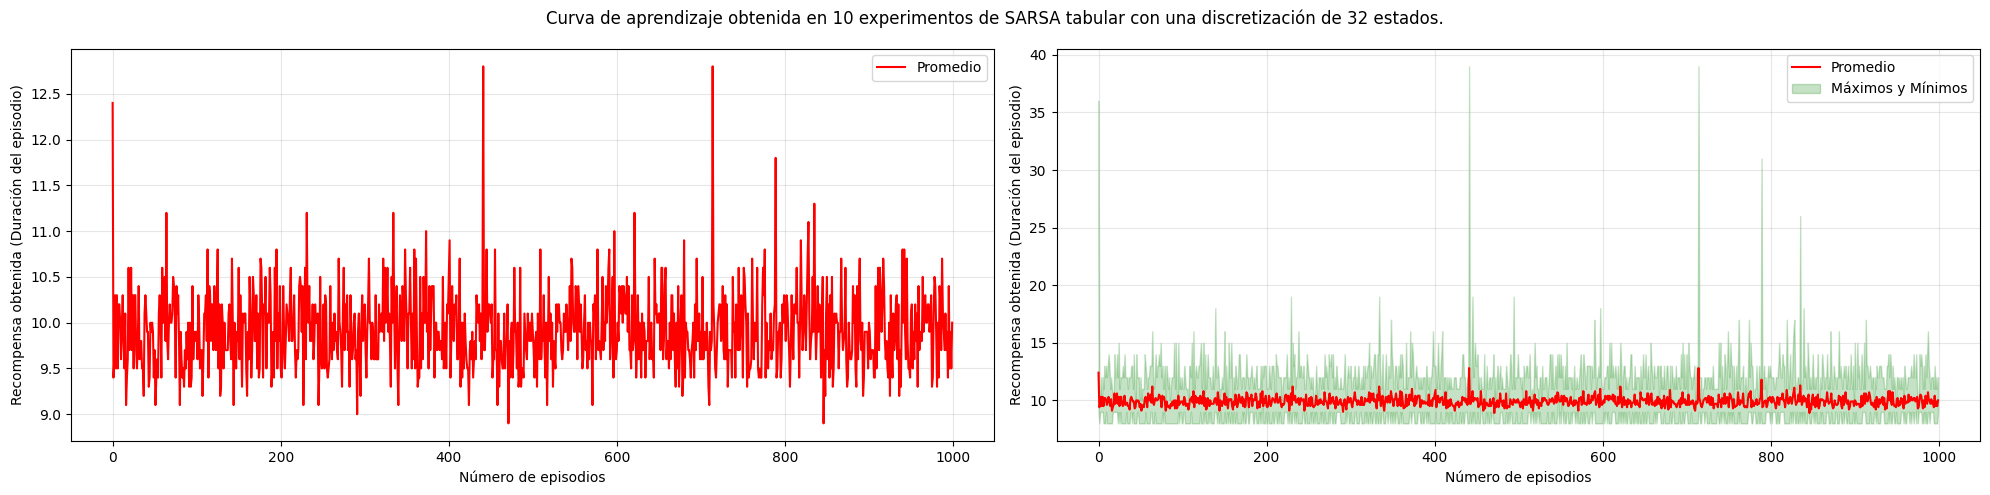

In [62]:
#TRAIN SARSA
#Ejemplo de un entrenamiento de un agente con SARSA

# Se crea un agente con una división del espacio de observación en 2*2*4*2=32 estados
# Dividimos el espacio de cart position en 2, el de cart velocity en 2, el de pole angle en 4 y el de pole angular velocity en 2, lo cual genera 32 estados posibles
# Hiperparámetros escogidos (Ver Figura 2 y 3): gamma=1, alpha=0.1, epsilon=0.1
# Se pasa a la clase los hiperparámetros, el nombre del ambiente, y una tupla de 4 elementos con la discretización por variable
Agente_ejemplo_1=Learning_CartPole(gamma=1,alpha=0.1,epsilon=0.1,env_name='CartPole-v1',divisions_per_variable=(2,2,4,2))

#Revisamos los estados discretizados
print("El espacio de observación ha sido discretizado de la siguiente forma:")
print(Agente_ejemplo_1.bins)
print("El total de estados es:",len(Agente_ejemplo_1.states))

#Se utiliza la función "Plot_LearningCurve" para realizar el entrenamiento y también para realizar el análisis
#method: 'SARSA' o 'QLearning', escoge el algoritmo que se va a usar en el entrenamiento
#number_of_experiments: integer, cuántas veces se va a repetir el entrenamiento para calcular una recompensa promedio
#number_of_episodes: integer, por cuántos episodios se va a entrenar cada experimento con el algoritmo escogido
mean_reward_SARSA=Agente_ejemplo_1.Plot_LearningCurve(method='SARSA',number_of_experiments=10,number_of_episodes=1000)

#Recuerde -> Un episodio se cuenta desde que inicia la simulación hasta que se da la condición de truncated o terminated, y un experimento será cuando se completan X episodios
#Después de terminar la ejecución, se generan gráficas con la recompensa promedio por episodio y la comparativa con los máximos y mínimos observados
#El tiempo de ejecución es altamente dependiente de la discretización, cantidad de experimentos y cantidad de episodios

En el mismo agente se guarda la política aprendida durante el entrenamiento. Se puede entonces escoger una acción según está política y realizar una simulación similar a como se vió en la sección anterior. Un ejemplo con 10 episodios se muestra a continuación:

In [63]:
#TEST SARSA
#Ejemplo de evaluación de un agente con SARSA

test_total_reward_SARSA_ejemplo1=0 #un contador donde se sumarán todas las recompensas obtenidas
num_episodes=10 #cantidad de episodios a simular

Agente_ejemplo_1.CreateEpsilonGreedyPolicy() #Se llama a esta función primero para guardar una política a partir del último entrenamiento

for i in range(num_episodes): #simulará los episodios
  R,t=Agente_ejemplo_1.ExecutePolicy() #La función ExecutePolicy de la clase proporcionada ya simula un episodio completo. Retorna el retorno total y la cantidad de pasos simulados
  test_total_reward_SARSA_ejemplo1 += R #suma el retorno
  print("Total Reward episodio {}: {}".format(i+1, R)) #Imprime el retorno obtenido en el episodio i

test_mean_reward_SARSA_ejemplo1 = test_total_reward_SARSA_ejemplo1/num_episodes #Calcula la recompensa promedio
print("Recompensa promedio sobre {} episodios: {}".format(num_episodes,test_mean_reward_SARSA_ejemplo1)) #imprime la recompensa promedio

Agente_ejemplo_1.PlayVideo() #La función PlayVideo realiza una simulación adicional y muestra el video

Total Reward episodio 1: 8.0
Total Reward episodio 2: 10.0
Total Reward episodio 3: 9.0
Total Reward episodio 4: 9.0
Total Reward episodio 5: 9.0
Total Reward episodio 6: 10.0
Total Reward episodio 7: 9.0
Total Reward episodio 8: 11.0
Total Reward episodio 9: 9.0
Total Reward episodio 10: 9.0
Recompensa promedio sobre 10 episodios: 9.3
Total Reward Simulación Video:  10.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:   0%|          | 0/12 [00:00<?, ?it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1741856674.6893198.mp4, 720000 bytes wanted but 0 bytes read,at frame 11/12, at time 0.37/0.37 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

                                                   

Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Se puede hacer también el mismo procedimiento con Q-Learning, únicamente cambiando algunos parámetros y algunos llamados de funciones:

El espacio de observación ha sido discretizado de la siguiente forma:
[array([-4.8,  4.8]), array([-2.,  2.]), array([-0.418     , -0.13933333,  0.13933333,  0.418     ]), array([-2.,  2.])]
El total de estados es: 32


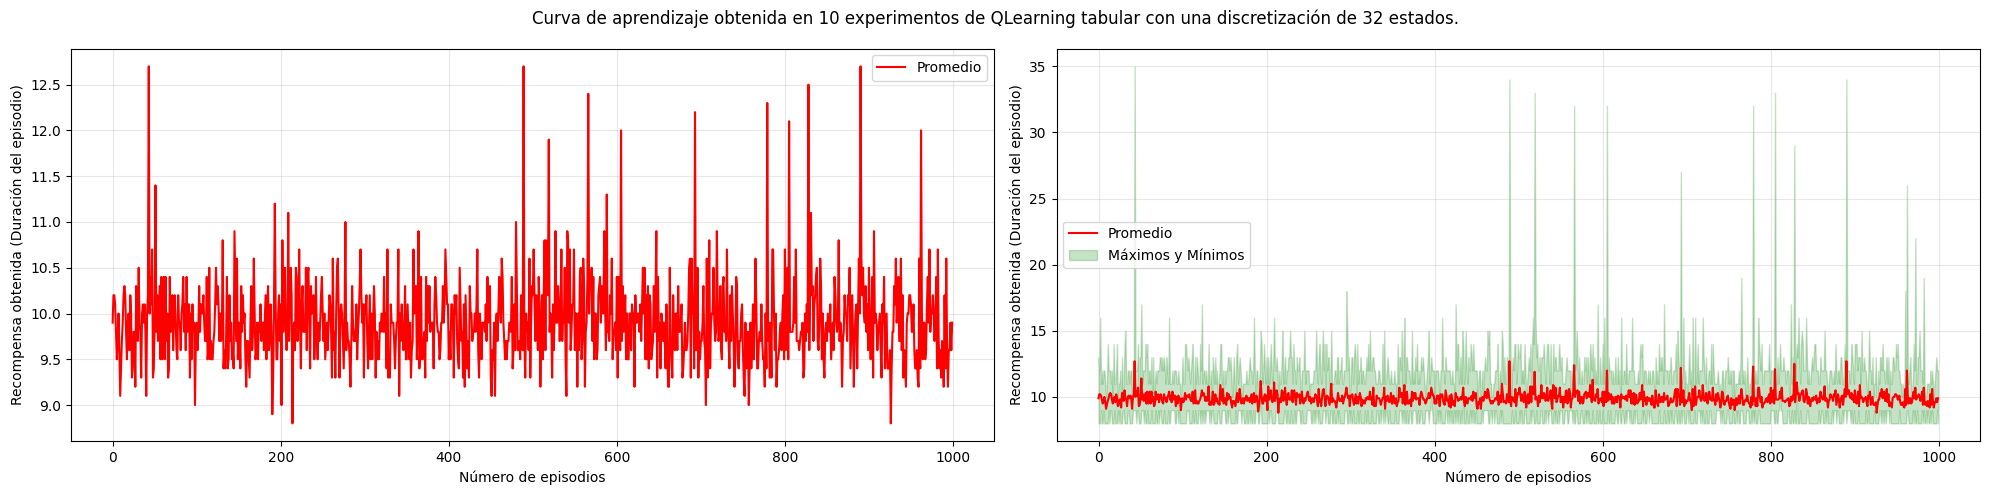

In [55]:
#TRAIN Q-Learning
#Ejemplo de un entrenamiento de un agente con Q-Learning

# Se crea otro agente igual que en el caso de SARSA
Agente_ejemplo_2=Learning_CartPole(gamma=1,alpha=0.1,epsilon=0.1,env_name='CartPole-v1',divisions_per_variable=(2,2,4,2))

#Revisamos los estados discretizados
print("El espacio de observación ha sido discretizado de la siguiente forma:")
print(Agente_ejemplo_2.bins)
print("El total de estados es:",len(Agente_ejemplo_2.states))

#Para el entrenamiento, mantenemos los mismos parámetros de SARSA, únicamente se debe cambiar el método
mean_reward_QLearning=Agente_ejemplo_2.Plot_LearningCurve(method='QLearning',number_of_experiments=10,number_of_episodes=1000)

In [61]:
#TEST Q-Learning
#Ejemplo de evaluación de un agente con Q-Learning

test_total_reward_QLearning_ejemplo2=0 #un contador donde se sumarán todas las recompensas obtenidas
num_episodes=10 #cantidad de episodios a simular

Agente_ejemplo_2.CreateGreedyPolicy() #Se llama a esta función primero para guardar una política a partir del último entrenamiento

for i in range(num_episodes): #simulará los episodios
  R,t=Agente_ejemplo_2.ExecutePolicy() #La función ExecutePolicy de la clase proporcionada ya simula un episodio completo. Retorna el retorno total y la cantidad de pasos simulados
  test_total_reward_QLearning_ejemplo2 += R #suma el retorno
  print("Total Reward episodio {}: {}".format(i+1, R)) #Imprime el retorno obtenido en el episodio i

test_mean_reward_QLearning_ejemplo2 = test_total_reward_QLearning_ejemplo2/num_episodes #Calcula la recompensa promedio
print("Recompensa promedio sobre {} episodios: {}".format(num_episodes,test_mean_reward_QLearning_ejemplo2)) #imprime la recompensa promedio

Agente_ejemplo_2.PlayVideo() #La función PlayVideo realiza una simulación adicional y muestra el video

Total Reward episodio 1: 10.0
Total Reward episodio 2: 9.0
Total Reward episodio 3: 10.0
Total Reward episodio 4: 9.0
Total Reward episodio 5: 10.0
Total Reward episodio 6: 8.0
Total Reward episodio 7: 9.0
Total Reward episodio 8: 9.0
Total Reward episodio 9: 8.0
Total Reward episodio 10: 10.0
Recompensa promedio sobre 10 episodios: 9.2
Total Reward Simulación Video:  10.0
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:   0%|          | 0/12 [00:00<?, ?it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.11/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1741856658.7951171.mp4, 720000 bytes wanted but 0 bytes read,at frame 11/12, at time 0.37/0.37 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+

                                                   

Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


## Ejercicio práctico

En el anterior ejemplo la discretización es muy burda y también la cantidad de episodios usada fue pequeña para disminuir el tiempo de ejecución. Ahora usted mismo modifique:

*   Discretización del espacio de observación.
*   Número de episodios para el entrenamiento.
*   Valor del hiperparámetro $\alpha$ (ver Figura 2 y 3).
*   Valor del hiperparámetro $\epsilon$ (ver Figura 2 y 3).

Conserve $\gamma=1$.

Realice entrenamientos de SARSA y Q-Learning con una discretización de 300 estados y otra de 3000 estados aproximadamente. Varíe y experimente con los otros parámetros.

In [ ]:
# Train y Test SARSA con discretización de 300 estados

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

In [ ]:
# Train y Test SARSA con discretización de 3000 estados

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

In [ ]:
# Train y Test Q-Learning con discretización de 300 estados

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

In [ ]:
# Train y Test Q-Learning con discretización de 3000 estados

# =====================================================
# COMPLETAR ===========================================
#

# =====================================================

# Métodos con Redes Neuronales  

Ahora realizaremos el entrenamiento utilizando aproximación de funciones con redes neuronales en lugar de una discretización del espacio de observación.


## Ejemplo de uso

El ejemplo a continuación utiliza la librería <a href="https://github.com/inarikami/keras-rl2/blob/master/examples/dqn_cartpole.py">keras-rl2</a>, con la cual se pueden crear las redes neuronales y usar los los algoritmos ya implementados. La librería y funciones específicas ya fueron importadas anteriormente.

In [101]:
class GymWrapper(gym.Wrapper):
    def __init__(self, env):
        gym.Wrapper.__init__(self, env)
        self.env = env

    def reset(self, **kwargs):
        obs, _ = self.env.reset(**kwargs)
        return obs

    def step(self, action):
        obs, reward, done, info, _ = self.env.step(action)
        return obs, reward, done, {}

env = GymWrapper(gym.make('CartPole-v1'))


#env = gym.make('CartPole-v1', render_mode = "rgb_array") # Crea el ambiente de CartPole
np.random.seed(613)
env.reset(seed=613) #El ambiente en este caso se inicializa con una semilla aleatoria

#La Red Neuronal tiene entradas equivalentes al número de estados y salidas equivalentes al número de acciones
nb_space=env.observation_space.shape #Obtiene el tamaño del espacio de observación
nb_actions = env.action_space.n #Obtiene el tamaño del espacio de acciones

#Arquitectura de la Red Neuronal
# Modelo secuencial, una capa después de otra
model = Sequential()
#Capa de Entrada
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
#Capa "Escondida"
model.add(Dense(16,activation='relu'))
#Capa de Salida
model.add(Dense(nb_actions,activation='relu'))


print(model.summary()) #muestra las neuronas y cantidad de parámetros de la red


#Configuración
memory = SequentialMemory(limit=50000, window_length=1) #límite de la memoria
policy = BoltzmannQPolicy() #política ainicial

#se crea un agente de SARSA, ya incluido en keras-rl2
#se carga la red, el número de acciones, un número de pasos donde no hará actualizaciones, y la política inicial
#En la red usaremos el optimizador Adam
sarsa_ej1 = SARSAAgent(model=model, nb_actions=nb_actions, nb_steps_warmup=100, policy=policy)
sarsa_ej1.compile(Adam(learning_rate=1e-3), metrics=['mae'])

#Salvaremos los pesos iniciales de la red, lo cual es muy útil si se quiere entrenar varios agentes
model.save_weights('model_valoresiniciales.h5')

#Entrenamiento de la red neuronal
sarsa_ej1.load_weights('model_valoresiniciales.h5') #carga los pesos iniciales para entrenar desde 0
sarsa_ej1.fit(env, nb_steps=25000, visualize=False, verbose=2) #Proceso de entrenamiento
sarsa_ej1.save_weights('sarsa_ej1_{}_weights.h5f'.format('CartPole-v1'), overwrite=True) #Salva los pesos finales de la red

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 4)                 0         
                                                                 
 dense_58 (Dense)            (None, 16)                80        
                                                                 
 dense_59 (Dense)            (None, 2)                 34        
                                                                 
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None


  updates=self.state_updates,



Training for 25000 steps ...
    16/25000: episode: 1, duration: 0.447s, episode steps:  16, steps per second:  36, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.688 [0.000, 1.000],  loss: --, mae: --, mean_q: --
    37/25000: episode: 2, duration: 0.066s, episode steps:  21, steps per second: 319, episode reward: 21.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.429 [0.000, 1.000],  loss: --, mae: --, mean_q: --
    53/25000: episode: 3, duration: 0.057s, episode steps:  16, steps per second: 282, episode reward: 16.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.688 [0.000, 1.000],  loss: --, mae: --, mean_q: --
    65/25000: episode: 4, duration: 0.028s, episode steps:  12, steps per second: 432, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.667 [0.000, 1.000],  loss: --, mae: --, mean_q: --
    92/25000: episode: 5, duration: 0.082s, episode steps:  27, steps per second: 330, episode reward: 27.000, 

AttributeError: 'Adam' object has no attribute 'get_updates'

In [81]:
# Crea el ambiente
env = gym.make('CartPole-v1', render_mode = "rgb_array") #crea ambiente CartPole-v1
np.random.seed(613)
env.reset(seed=613) #semilla aleatoria
nb_actions = env.action_space.n #obtiene la cantidad de acciones (2)

# Modelo secuencial, una capa después de otra
model = Sequential()

#Capa de Entrada
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
#Capa "Escondida" con 2 Neuronas
model.add(Dense(2,activation='relu'))
#Capa de Salida
model.add(Dense(nb_actions,activation='relu'))

print(model.summary()) #muestra las neuronas y parámetros de la red

memory = SequentialMemory(limit=50000, window_length=1) #límite de la memoria
policy = BoltzmannQPolicy() #política inicial


#se crean 5 agentes DQN independientes
dqn1_4 = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=100, target_model_update=1e-2, policy=policy)
dqn1_4.compile(Adam(learning_rate=1e-3), metrics=['mae'])

model.save_weights('model_valoresiniciales.h5') #guarda los valores iniciales

#Se entrenan los angetes con 25000 pasos cada uno y se guardan los pesos
dqn1_4.load_weights('model_valoresiniciales.h5') #carga los pesos iniciales para entrenar desde 0
history1_dqn_4=dqn1_4.fit(env, nb_steps=25000, visualize=False, verbose=2)
dqn1_4.save_weights('dqn1_4_{}_weights.h5f'.format('CartPole-v1'), overwrite=True)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 4)                 0         
                                                                 
 dense_27 (Dense)            (None, 2)                 10        
                                                                 
 dense_28 (Dense)            (None, 2)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
None


AttributeError: 'Adam' object has no attribute '_name'

# Comparación  
Contenido de la sección 7.  


# Conclusiones  
Contenido de la sección 8.

# Referencias

[1] Sutton, R. S. and Barto, A. G. (2018). Reinforcement Learning: An Introduction. The MIT Press, second edition.

[2] Mnih, V., Kavukcuoglu, K., Silver, D., Graves, A., Antonoglou, I., Wierstra, D., and Riedmiller, M. (2013). Playing atari with deep reinforcement learning. cite arxiv:1312.5602Comment: NIPS Deep Learning Workshop 2013.
